In [2]:
# For manipulating

import pandas as pd
import numpy as np

# For visualization

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# For machine learning

from sklearn import svm, datasets, ensemble
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from scipy.stats import norm, skew #for some statistics
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# usefull modules

import random
import time
import datetime
import warnings
import tqdm
warnings.filterwarnings('ignore')


%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_excel("./SalesData.xlsx")

In [4]:
print(len(df))
df.head()

12146


,AREA,YEARMONTH,YEAR,MONTH,CUSTOMER TYPE,PRODUCT CATEGORY,REVENUE,NUMBER OF CUSTOMER,PROFIT
0,Adana,201801,2018,1,Personal,Snack,498550.550,15076,89825.584
1,Ankara,201801,2018,1,Personal,Snack,334911.520,11882,59841.680
2,Antalya,201801,2018,1,Personal,Snack,325323.540,9995,55794.484
3,Asya,201801,2018,1,Personal,Snack,495731.600,12688,93806.578
4,Avrupa,201801,2018,1,Personal,Snack,415212.030,10324,78375.456


In [5]:
from datetime import datetime

In [6]:
df['date_day'] = np.nan

In [7]:
date_list = []
for i in range(len(df)):
    date_list.append(str(df['YEAR'][i]) + "-" + str(df['MONTH'][i]) + "-" + '15')
df['date_day'] = date_list

In [8]:
df['date_day'] = pd.to_datetime(df['date_day'])

In [8]:
print(df.dtypes)
df.tail(2)

AREA                          object
YEARMONTH                      int64
YEAR                           int64
MONTH                          int64
CUSTOMER TYPE                 object
PRODUCT CATEGORY              object
REVENUE                      float64
NUMBER OF CUSTOMER             int64
PROFIT                       float64
date_day              datetime64[ns]
dtype: object


,AREA,YEARMONTH,YEAR,MONTH,CUSTOMER TYPE,PRODUCT CATEGORY,REVENUE,NUMBER OF CUSTOMER,PROFIT,date_day
12144,Konya,201911,2019,11,Traditional,Cleaning Products,79308.540,694,13956.660,2019-11-15
12145,Samsun,201911,2019,11,Traditional,Cleaning Products,75723.820,703,7368.474,2019-11-15


In [9]:
## To control the data if there is a null or missing any row,as we can see from the output there is no missing data

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
date_day,0,0.000
PROFIT,0,0.000
NUMBER OF CUSTOMER,0,0.000
REVENUE,0,0.000
PRODUCT CATEGORY,0,0.000


In [10]:
df['YEARMONTH']

0        201801
1        201801
2        201801
3        201801
4        201801
          ...  
12141    201911
12142    201911
12143    201911
12144    201911
12145    201911
Name: YEARMONTH, Length: 12146, dtype: int64

In [11]:
## See the Data Types
df.dtypes

AREA                          object
YEARMONTH                      int64
YEAR                           int64
MONTH                          int64
CUSTOMER TYPE                 object
PRODUCT CATEGORY              object
REVENUE                      float64
NUMBER OF CUSTOMER             int64
PROFIT                       float64
date_day              datetime64[ns]
dtype: object

In [12]:
df.describe()

,YEARMONTH,YEAR,MONTH,REVENUE,NUMBER OF CUSTOMER,PROFIT
count,12146.000,12146.000,12146.000,12146.000,12146.000,12146.000
mean,201854.096,2018.478,6.262,582858.387,3857.873,49346.384
std,49.817,0.500,3.326,1085444.160,3505.734,60217.147
min,201801.000,2018.000,1.000,57108.940,595.000,-358207.905
25%,201806.000,2018.000,3.000,175363.327,1647.000,16039.313
50%,201812.000,2018.000,6.000,316303.945,2444.500,32935.278
75%,201906.000,2019.000,9.000,549026.160,5000.250,60872.822
max,201911.000,2019.000,12.000,17483427.390,26338.000,1409820.027


In [13]:
## Looking the Categories

df['PRODUCT CATEGORY'].unique()

array(['Snack', 'Meat Products', 'Paper Product', 'Personal Care',
       'Dry Food', 'Warm Drinks', 'Tabacco', 'Oil and Margarin',
       'Cold Beverages', 'Dairy Products', 'Cleaning Products'],
      dtype=object)

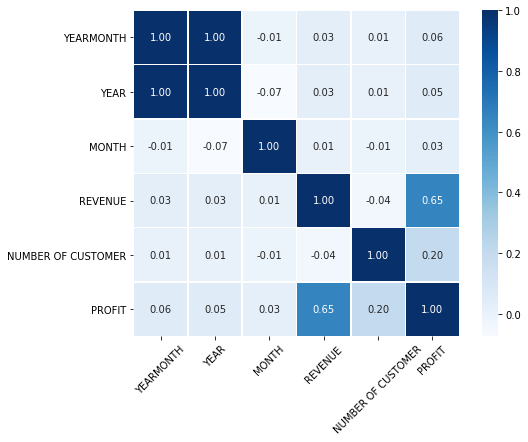

In [16]:
## By the graph,There is a high positive correlation between Profit and Revenue, and also Number Of Customer and Profit.

f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap='Blues',
            annot=True, linewidths=0.5,
            fmt=".2f",
            square=True, ax=ax)

 
### Due to the cut off halfs from bot and top, to make graph looks better, we will make some customization

b, t = plt.ylim()               # discover the values for bottom and top
b += 0.5                        # Add 0.5 to the bottom
t -= 0.5                        # Subtract 0.5 from the top
plt.ylim(b, t)                  # update the ylim(bottom, top) values


xt = plt.xticks(rotation=45)


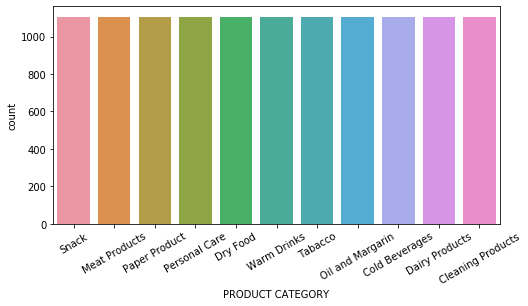

In [15]:
## To see the count of each categories if they are the same or not. They are same

plt.figure(figsize = (8,4))
sns.countplot(x = 'PRODUCT CATEGORY',data = df)
xt = plt.xticks(rotation=30)

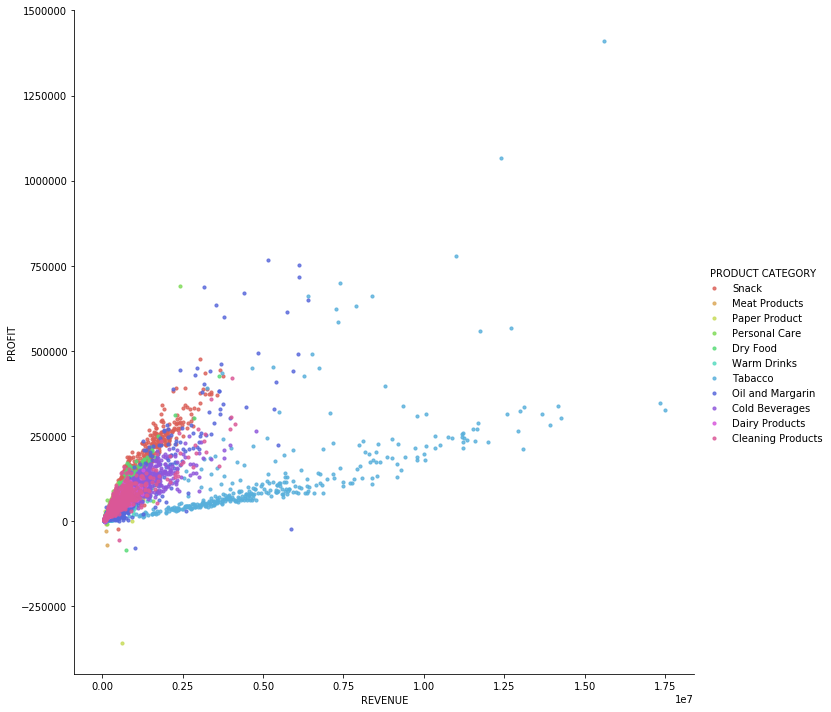

In [16]:
## To see the which category type is the most profitable and which is not.

sns.lmplot(x='REVENUE' , y='PROFIT', data=df, hue='PRODUCT CATEGORY', palette='hls',
           fit_reg=False,size= 10, aspect=9/9, legend_out=True,scatter_kws={"s": 10})
plt.show()


In [17]:
df_2 = df.groupby(['YEAR','MONTH', 'AREA','PRODUCT CATEGORY']).agg({'PROFIT': 'sum',
                                                                    'REVENUE': 'sum',
                                                                    'NUMBER OF CUSTOMER':'sum',})

In [18]:
df_2.head()

PROFIT     REVENUE  NUMBER OF CUSTOMER
YEAR MONTH AREA  PRODUCT CATEGORY                                            
2018 1     Adana Cleaning Products 163637.445 1561963.240               16050
                 Cold Beverages    172467.917 2285556.970               17747
                 Dairy Products    120439.569 1191101.050               15250
                 Dry Food          164694.385 1323640.710               20387
                 Meat Products      13805.943  269763.730                5549

In [19]:
## To see the monthly increasing
df_aylik = df.groupby(['PRODUCT CATEGORY', 'AREA','MONTH']).agg({'PROFIT': 'sum',
                                                                 'REVENUE': 'sum',
                                                                 'NUMBER OF CUSTOMER':'sum'})

In [20]:
df_aylik

PROFIT     REVENUE  NUMBER OF CUSTOMER
PRODUCT CATEGORY  AREA  MONTH                                           
Cleaning Products Adana 1     377416.516 3471038.060               36011
                        2     392637.343 4048303.120               36523
                        3     399490.166 3908558.660               38610
                        4     357985.906 3554460.740               36895
                        5     398800.905 4030249.870               38463
...                                  ...         ...                 ...
Warm Drinks       İzmir 8     264568.296 2974899.310               27963
                        9     334510.872 3724033.320               31600
                        10    267439.987 3747151.140               33856
                        11    175745.258 2364384.690               19323
                        12    211251.001 2784668.640               16855

[2114 rows x 3 columns]

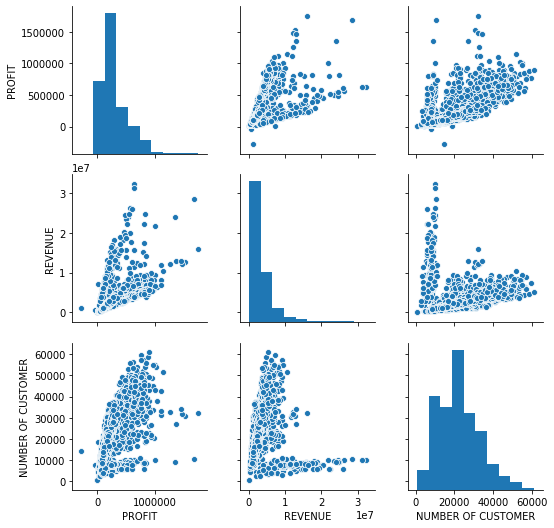

In [21]:
sns.pairplot(df_aylik)

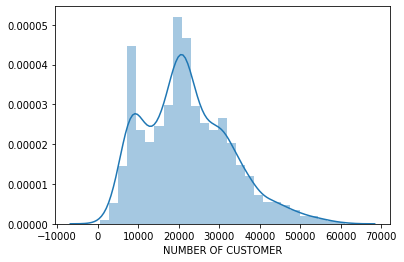

In [22]:
sns.distplot(df_aylik['NUMBER OF CUSTOMER'])

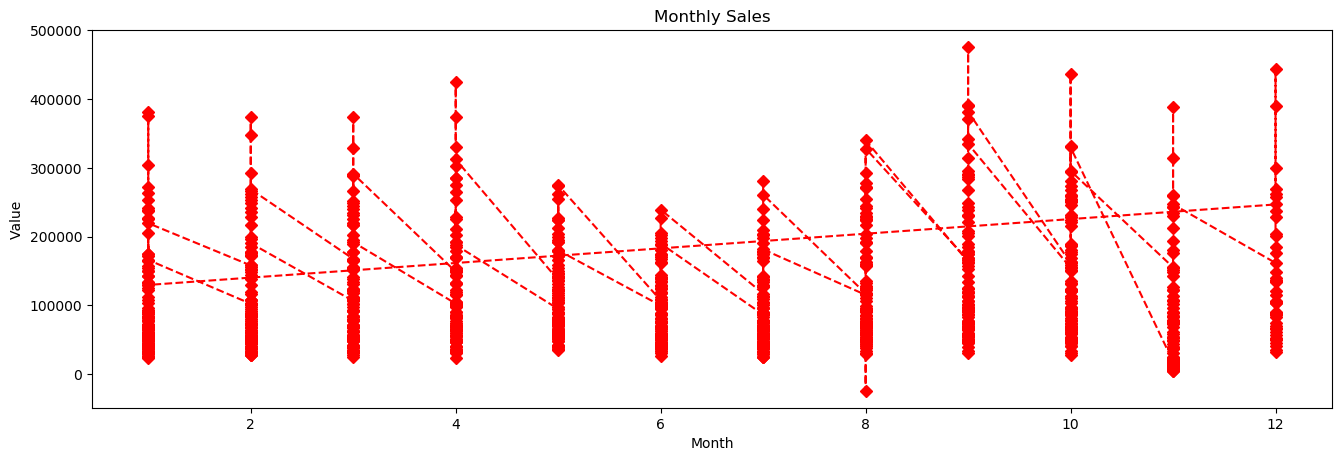

In [24]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, 'D--',color='red')
    ## D-- , fmt diye geçer. daha fazla ayrıntı için : https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

df_3 = df[df['AREA']=='Adana']  
df_3 = df[df['PRODUCT CATEGORY']=='Snack']
    
plot_df(df_3, x=df_3.MONTH, y=df_3.PROFIT, title='Monthly Sales') 
## İstenilen ürünün grafikleri 

In [25]:
df_model = pd.get_dummies(df)
df_model = df_model.drop('YEARMONTH', axis=1)

In [26]:
df_model.head(5)

,YEAR,MONTH,REVENUE,NUMBER OF CUSTOMER,PROFIT,date_day,AREA_Adana,AREA_Ankara,AREA_Antalya,AREA_Asya,...,PRODUCT CATEGORY_Cold Beverages,PRODUCT CATEGORY_Dairy Products,PRODUCT CATEGORY_Dry Food,PRODUCT CATEGORY_Meat Products,PRODUCT CATEGORY_Oil and Margarin,PRODUCT CATEGORY_Paper Product,PRODUCT CATEGORY_Personal Care,PRODUCT CATEGORY_Snack,PRODUCT CATEGORY_Tabacco,PRODUCT CATEGORY_Warm Drinks
0,2018,1,498550.550,15076,89825.584,2018-01-15,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2018,1,334911.520,11882,59841.680,2018-01-15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2018,1,325323.540,9995,55794.484,2018-01-15,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,1,495731.600,12688,93806.578,2018-01-15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2018,1,415212.030,10324,78375.456,2018-01-15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Train Test Split

In [27]:
df_model = df_model.drop(['date_day'],axis=1)
df_model_target = df_model['PROFIT']
df_model = df_model.drop(['PROFIT'],axis=1) 

X = StandardScaler().fit_transform(df_model) #where X is my data matrix

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,df_model_target,test_size=0.3,random_state=2)

## Basic Linear Regression

In [29]:
start_time = time.time()

bl_reg = LinearRegression()
bl_reg.fit(X_train, Y_train)

print(bl_reg.score(X_test, Y_test))

print("--- %s seconds --- execution time" % (time.time() - start_time))

0.6083459144980476
--- 0.048868656158447266 seconds --- execution time


R^2: 0.6083459144980476
MAE: 19393.370283249966
MSE: 1627727599.9877217
RMSE: 40345.10627062125


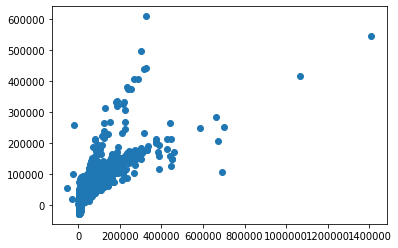

In [30]:
Y_pred = bl_reg.predict(X_test)
plt.scatter(Y_test,Y_pred)

# Compute the metrics
print("R^2: {}".format(bl_reg.score(X_test, Y_test)))
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


## Random Forest Regressor

In [31]:
start_time = time.time()

rf_reg = ensemble.RandomForestRegressor(max_depth=4, 
                                         random_state=2,
                                         n_estimators=500)
rf_reg.fit(X_train, Y_train)
print(rf_reg.score(X_test, Y_test))

print("--- %s seconds --- execution time" % (time.time() - start_time))

0.6992166835119658
--- 4.0243144035339355 seconds --- execution time


R^2: 0.6992166835119658
MAE: 12997.156892958435
MSE: 1250065616.5400188
RMSE: 35356.267005157926


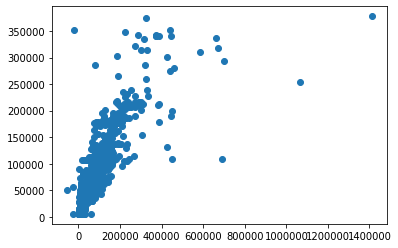

In [32]:
Y_pred = rf_reg.predict(X_test)
plt.scatter(Y_test,Y_pred)

# Compute the metrics
print("R^2: {}".format(rf_reg.score(X_test, Y_test)))
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

## Gradient Boosting Regressor

In [33]:
start_time = time.time()

gb_reg = ensemble.GradientBoostingRegressor(n_estimators = 500,
                                         max_depth= 4,
                                         min_samples_split = 10,
                                         learning_rate= 0.02,
                                         loss = 'ls')
gb_reg.fit(X_train, Y_train)

print(gb_reg.score(X_test, Y_test))  ## R^2 score (R square score)
print("--- %s seconds --- execution time" % (time.time() - start_time))

0.8161885911564696
--- 4.879950046539307 seconds --- execution time


R^2: 0.8161885911564696
MAE: 7978.4700304838725
MSE: 763926419.8758122
RMSE: 27639.21887238878


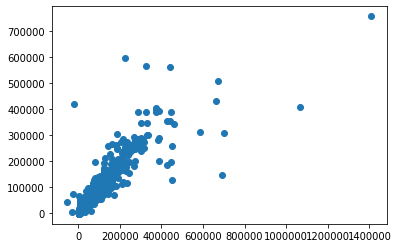

In [34]:
Y_pred = gb_reg.predict(X_test)
plt.scatter(Y_test,Y_pred)

# Compute the metrics
print("R^2: {}".format(gb_reg.score(X_test, Y_test)))
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

## Predict Next Month 

In [35]:
def moving_average(list_of_numbers):
    global window_average
    window_size = 3

    i = 0
    moving_averages = []
    while i < len(list_of_numbers) - window_size + 1:
        this_window = list_of_numbers[i : i + window_size]

        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1

In [36]:
moving_average([1,2,3])

In [37]:
window_average

2.0

In [38]:
def predict_amount(area,product_category,year,number):
    
    ## Number, should be 3 or 6, respect to the moving average
    subdf = df[df['AREA']==area]
    subdf = subdf[subdf['PRODUCT CATEGORY']==product_category]
    subdf = subdf[subdf['YEAR']==year]
    
    prof_list = subdf['PROFIT'].tolist()[-number:]
    rev_list = subdf['REVENUE'].tolist()[-number:]
    cus_list = subdf['NUMBER OF CUSTOMER'].tolist()[-number:]
    
    def moving_average(list_of_numbers):
        global window_average
        window_size = 3         ## windows size shows that take last three months to predict next
    
        i = 0
        moving_averages = []
        while i < len(list_of_numbers) - window_size + 1:
            this_window = list_of_numbers[i : i + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            i += 1
    
    moving_average(prof_list)
    print(" predicted 'profit' for 12th month is:",window_average,"previous month was:",prof_list[-1])
    
    moving_average(rev_list)
    print(" predicted 'revenue' for 12th month is:",window_average,"previous month was:",rev_list[-1])
    
    moving_average(cus_list)
    print(" predicted 'customer' for 12th month is:",window_average,"previous month was:",cus_list[-1])

In [39]:
print("Areas:", df['AREA'].unique().tolist())
print("---------")
print("Product Category:", df['PRODUCT CATEGORY'].unique().tolist())

Areas: ['Adana', 'Ankara', 'Antalya', 'Asya', 'Avrupa', 'Bursa', 'Denizli', 'Diyarbakır', 'Edirne', 'Erzurum', 'Gaziantep', 'İzmir', 'Kayseri', 'Kocaeli', 'Konya', 'Samsun', 'Satış Direktörlüğü']
---------
Product Category: ['Snack', 'Meat Products', 'Paper Product', 'Personal Care', 'Dry Food', 'Warm Drinks', 'Tabacco', 'Oil and Margarin', 'Cold Beverages', 'Dairy Products', 'Cleaning Products']


In [40]:
predict_amount('Ankara',"Snack",2019,3)

 predicted 'profit' for 12th month is: 11641.870751999997 previous month was: 20192.836003
 predicted 'revenue' for 12th month is: 114281.61333333333 previous month was: 195108.58
 predicted 'customer' for 12th month is: 968.0 previous month was: 820


In [41]:
predict_amount('İzmir','Cold Beverages',2019,3)

 predicted 'profit' for 12th month is: 9133.003337666656 previous month was: 7668.94665599999
 predicted 'revenue' for 12th month is: 106587.33666666667 previous month was: 100623.29000000001
 predicted 'customer' for 12th month is: 1304.6666666666667 previous month was: 895


In [42]:
predict_amount('Konya','Dairy Products',2019,3)

 predicted 'profit' for 12th month is: 5209.322155 previous month was: 2701.507603
 predicted 'revenue' for 12th month is: 70189.27666666667 previous month was: 64031.25
 predicted 'customer' for 12th month is: 843.3333333333334 previous month was: 692


In [43]:
predict_amount('Denizli','Oil and Margarin',2019,3)

 predicted 'profit' for 12th month is: 5820.865169000001 previous month was: 4150.585446
 predicted 'revenue' for 12th month is: 78462.74666666666 previous month was: 68891.29000000001
 predicted 'customer' for 12th month is: 756.0 previous month was: 670
